In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from scipy.stats import linregress
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Files found: ['/content/drive/MyDrive/Washington Band1 .TIF']


/usr/local/lib/python3.10/dist-packages/skimage/filters/rank/generic.py:262: UserWarning: Bad rank filter performance is expected due to a large number of bins (51336), equivalent to an approximate bitdepth of 15.6.
  image, footprint, out, mask, n_bins = _preprocess_input(image, footprint,


time= 0 hr   Scratch area= 21499941 pix²
y =  nan x  +  nan
R² =  0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


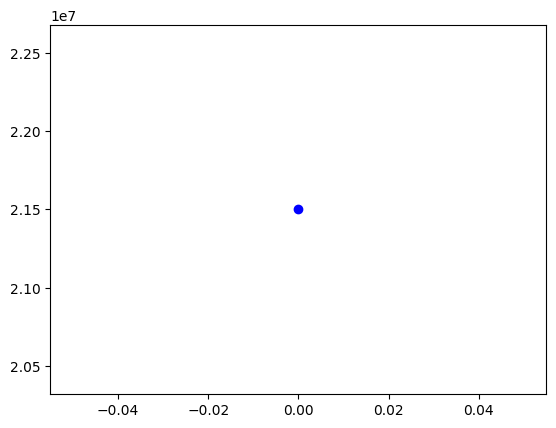

In [ ]:
time = 0
time_list = []
area_list = []

# Update the path and pattern based on your file structure
path = "/content/drive/MyDrive/Washington Band1 .TIF"

# Print the files returned by glob.glob() for debugging
files = glob.glob(path)
print("Files found:", files)

for file in files:
    img = io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix²")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

plt.plot(time_list, area_list, 'bo')  # Print blue dots scatter plot

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ", slope, "x", " + ", intercept)
print("R² = ", r_value**2)